# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# API Key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty lists for latitude-longitudes
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

# Identify nearest city for each set of lat-lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name

    # Add unique cities to cities list
    if city not in cities:
        cities.append(city)

# Print city count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Create URL for API
url = f"https://api.openweathermap.org/data/2.5/weather?q="

# Empty list to hold weather data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all cities and retrieve weather data
for i,city in enumerate(cities):

    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
    
    # Create endpoint URL 
    city_url = f"{url}{city}&units=metric&appid={weather_api_key}"

    # Log the url
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to counter
    record_count += 1

    # Run API request
    try:
        # Parse JSON
        city_weather = requests.get(city_url).json()
    
        # Parse out data
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | malango
Processing Record 4 of Set 1 | nadym
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | qamdo
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | akureyri
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | axim
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | shenjiamen
Processing Reco

In [4]:
# Convert list into dataframe
city_data_df = pd.DataFrame(city_data)

# Show count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,-22.44,100,94,1.87,RU,1700588135
1,grytviken,-54.2811,-36.5092,1.78,98,100,0.42,GS,1700588135
2,malango,-2.9627,119.9001,19.51,96,26,1.04,ID,1700588136
3,nadym,65.5333,72.5167,-24.40,100,35,1.25,RU,1700588137
4,west island,-12.1568,96.8225,25.99,78,75,3.60,CC,1700588138


In [6]:
# Export dataframe into csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-22.44,100,94,1.87,RU,1700588135
1,grytviken,-54.2811,-36.5092,1.78,98,100,0.42,GS,1700588135
2,malango,-2.9627,119.9001,19.51,96,26,1.04,ID,1700588136
3,nadym,65.5333,72.5167,-24.40,100,35,1.25,RU,1700588137
4,west island,-12.1568,96.8225,25.99,78,75,3.60,CC,1700588138


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

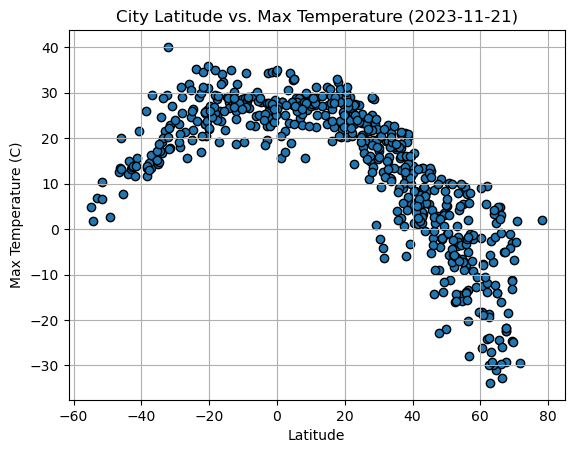

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-11-21)")
plt.grid()
           

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

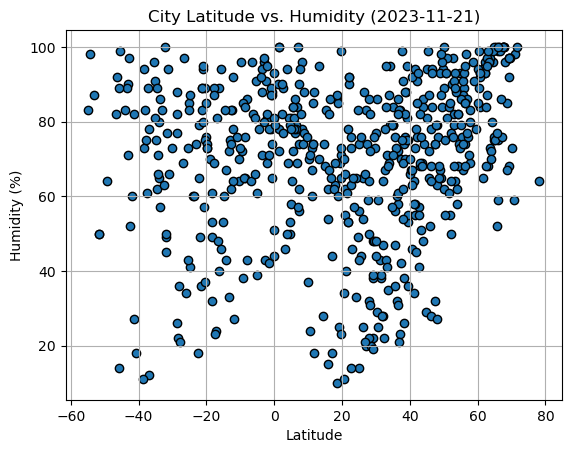

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-11-21)")
plt.grid()

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

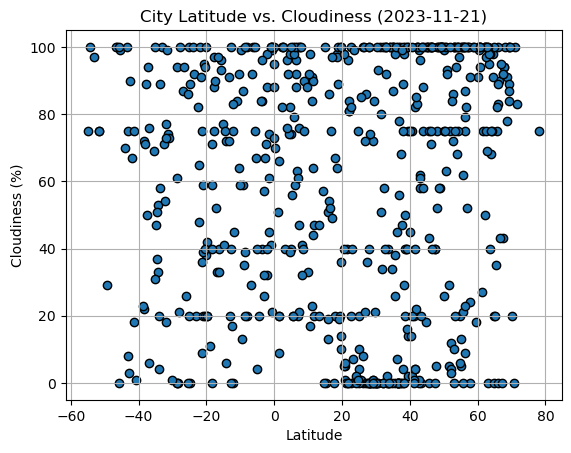

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-11-21)")
plt.grid()

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

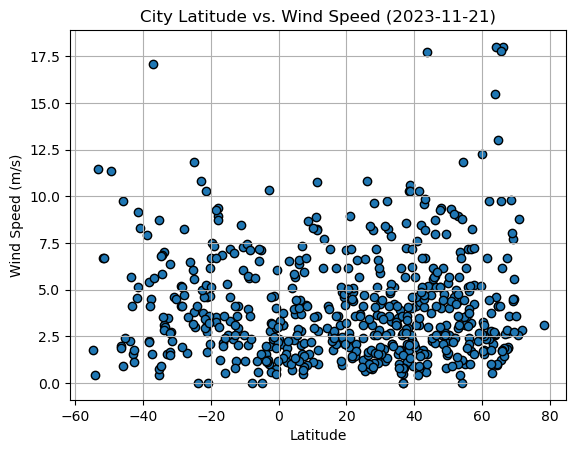

In [75]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-11-21)")
plt.grid()

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def regression(x,y):

    # Calculate slope and intercept
    m,b,r,p,s = linregress(x,y)

    # Calculate and plot new line
    fit = m*x + b
    plt.plot(x,fit,color="red")

    # Round the variables
    round_m = round(m,2)
    round_b = round(b,2)

    # Annotate plot
    plt.annotate(f"y = {round_m}x + {round_b}",(75,14),xycoords="subfigure pixels",color="red",size=13)
    plt.annotate(f"The r squared value is: {r**2}",(40,450),xycoords="subfigure pixels",color="black",size=8)


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,-22.44,100,94,1.87,RU,1700588135
3,nadym,65.5333,72.5167,-24.40,100,35,1.25,RU,1700588137
6,qamdo,31.1667,97.2333,-4.22,43,100,1.81,CN,1700588140
11,akureyri,65.6835,-18.0878,4.96,52,75,9.77,IS,1700588143
13,lihue,21.9789,-159.3672,20.76,90,81,4.85,US,1700588144


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,1.78,98,100,0.42,GS,1700588135
2,malango,-2.9627,119.9001,19.51,96,26,1.04,ID,1700588136
4,west island,-12.1568,96.8225,25.99,78,75,3.60,CC,1700588138
5,puerto natales,-51.7236,-72.4875,10.25,50,75,6.69,CL,1700587913
7,ushuaia,-54.8000,-68.3000,4.79,83,75,1.79,AR,1700588140


###  Temperature vs. Latitude Linear Regression Plot

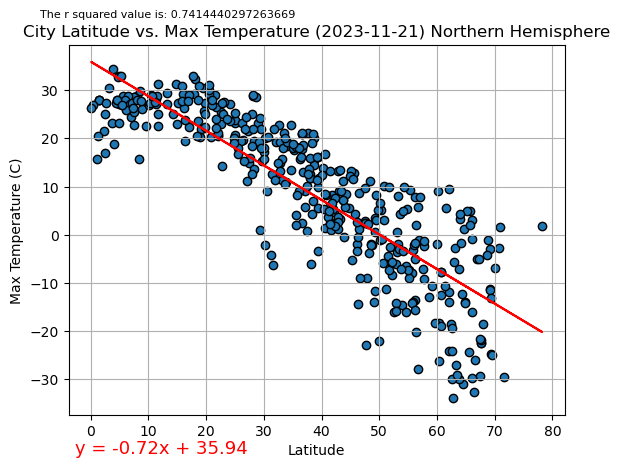

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-11-21) Northern Hemisphere")
plt.grid()

# Plot regression
northern_hemi_reg = regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


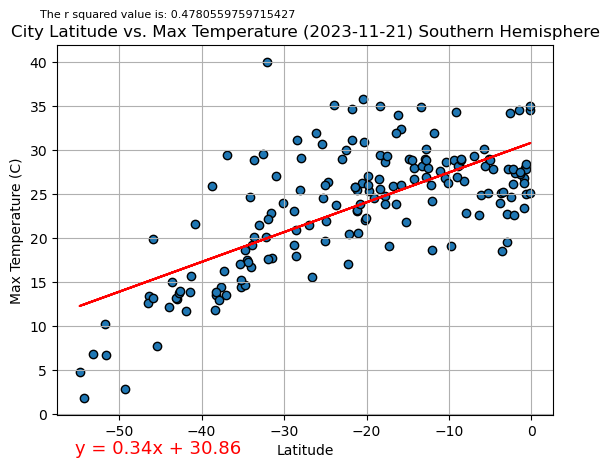

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-11-21) Southern Hemisphere")
plt.grid()

# Plot regression
southern_hemi_reg = regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


**Discussion about the linear relationship:** The linear regression clearly shows a positive trend between latitude and temperature. The r squared value also indicates a moderate correlation.

### Humidity vs. Latitude Linear Regression Plot

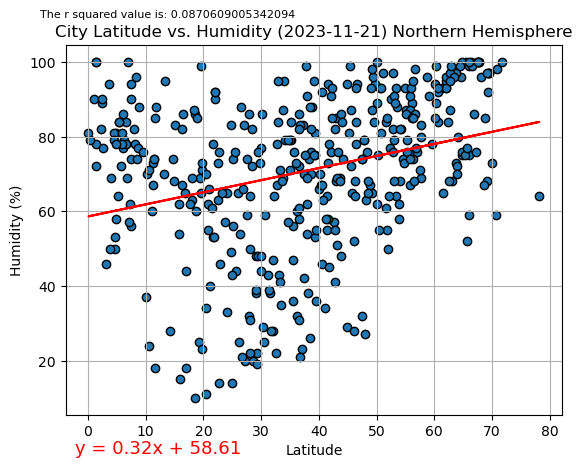

In [68]:
# Northern Hemisphere
# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-11-21) Northern Hemisphere")
plt.grid()

# Plot regression
northern_hemi_reg_humid = regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

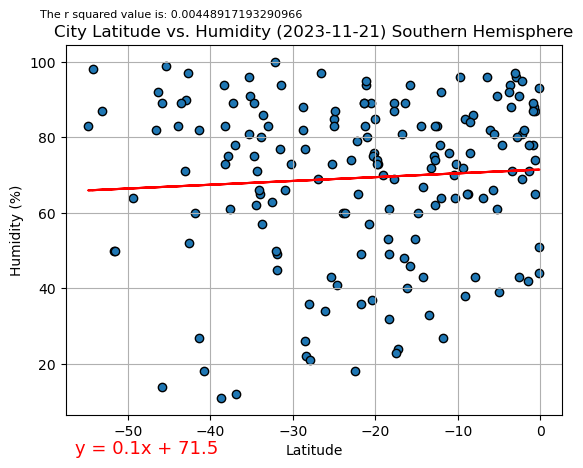

In [69]:
# Southern Hemisphere
# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-11-21) Southern Hemisphere")
plt.grid()

# Plot regression
southern_hemi_reg_humid = regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** According to the data, the humidity decreases as you move towards the equator. This could potentially be explained by wet and dry seasons near the equator. In the data, there is a greater variability in the humidity data near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

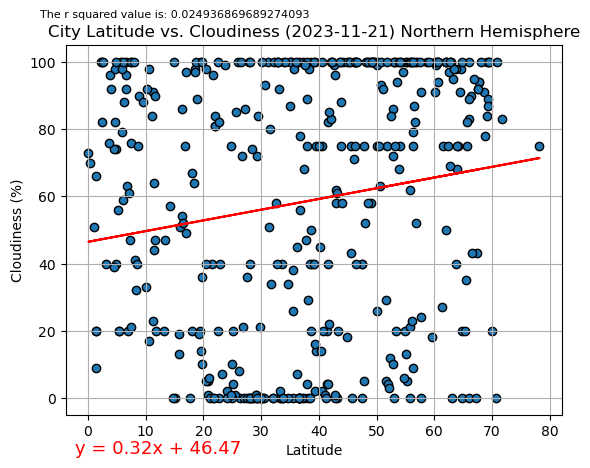

In [70]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-11-21) Northern Hemisphere")
plt.grid()

# Plot regression
northern_hemi_reg_cloud = regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

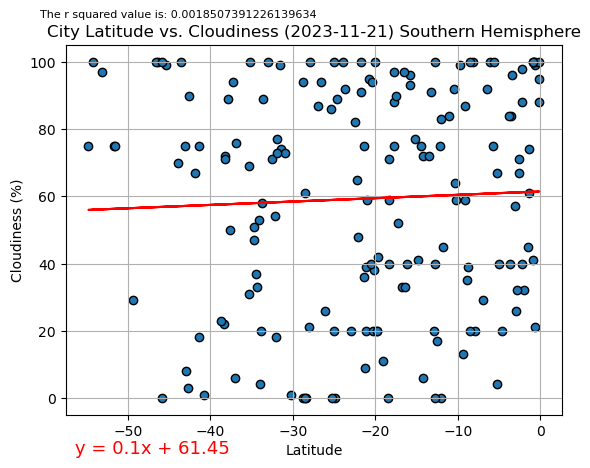

In [71]:
# Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-11-21) Southern Hemisphere")
plt.grid()

# Plot regression
southern_hemi_reg_cloud = regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** Cloudiness trends downward towards the equator in the northern hemisphere. However, the data is very sporadic and doesn't hold much value for deeper analysis.

### Wind Speed vs. Latitude Linear Regression Plot

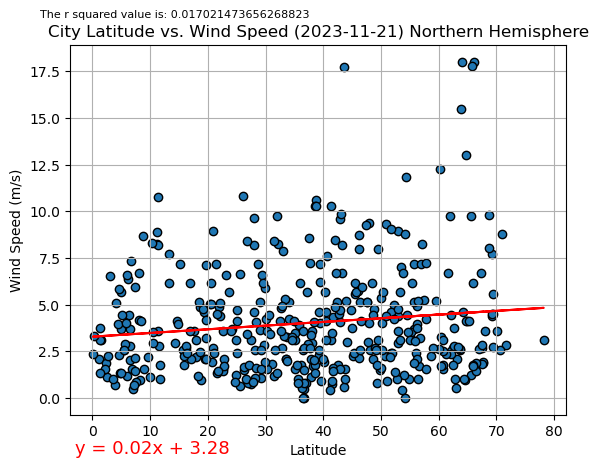

In [76]:
# Northern Hemisphere
# Build scatter plot for latitude vs. windspeed
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-11-21) Northern Hemisphere")
plt.grid()

# Plot regression
northern_hemi_reg_speed = regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

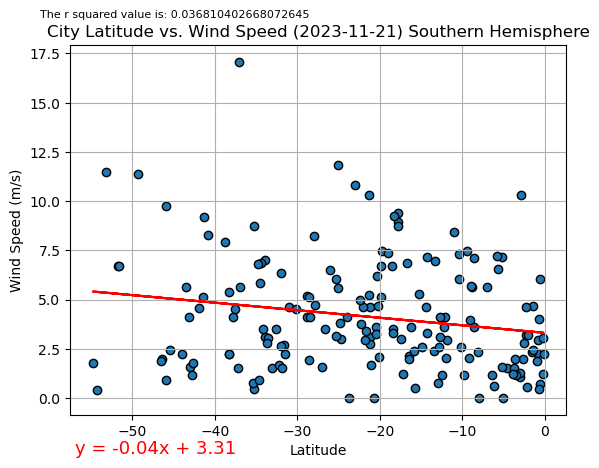

In [77]:
# Southern Hemisphere
# Build scatter plot for latitude vs. windspeed
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-11-21) Southern Hemisphere")
plt.grid()

# Plot regression
southern_hemi_reg_speed = regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Wind speed is stagnant across the board for both hemispheres and the r value indicates there is close to no correlation between the values. This indicates that overall, wind speed is unaffected by latitude. 